# Les métriques de régression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import *

In [9]:
y = np.array([1, 5, 7, 2, 6])
y_pred = np.array([3, 6, 500, 3, 4])

In [11]:
print('MSE :', mean_squared_error(y, y_pred))
print('RMSE :',np.sqrt( mean_squared_error(y, y_pred)))
print('MAE :', mean_absolute_error(y, y_pred))
print('Median Absolute Error :', median_absolute_error(y, y_pred))

MSE : 48611.8
RMSE : 220.48083816966954
MAE : 99.8
Median Absolute Error : 2.0


Application : anlyse du prix de l'immobilier à Boston

In [12]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

In [16]:
boston  = load_boston()
x = boston.data
y = boston.target

In [17]:
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

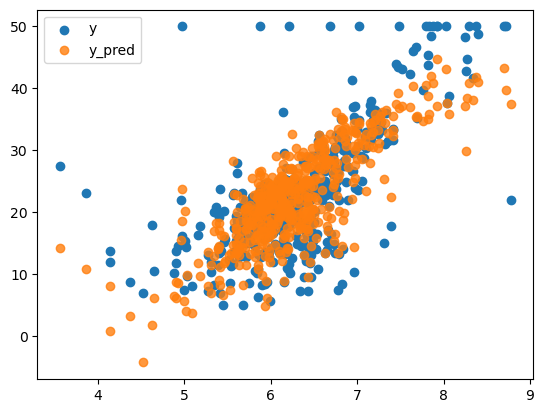

In [18]:
plt.scatter(x[:, 5], y, label = 'y')
plt.scatter(x[:, 5], y_pred, alpha = 0.8, label = 'y_pred')
plt.legend()
plt.show()

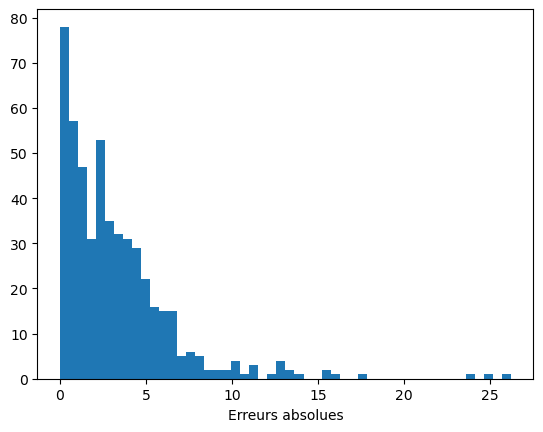

In [20]:
# Histogramme des erreurs

abs_err = np.abs(y - y_pred)
plt.hist(abs_err, bins = 50)
plt.xlabel('Erreurs absolues')
plt.show()

En vue de récolter plus d'informations, il convient d'utiliser toutes les métriques d'erreurs.

## Le coefficient de détermination R²

In [21]:
model.score(x, y)

0.7406426641094095

In [22]:
import sklearn.metrics

In [24]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [25]:
# Utiliser une métrique dans une cross-validation

from sklearn.model_selection import cross_val_score

cross_val_score(LinearRegression(), x, y, cv = 3, scoring = 'neg_mean_squared_error')

array([ -20.63230588,  -34.48294871, -451.90968255])